<style>
    .text_cell_render {
        font-family: Times New Roman, serif;
    }
</style>

<h1 align="center"> Stochastic Simulation Assignment 1 </h1>

---
---

In [2]:
### Generic Requirements ###
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from IPython.display import display

from mandelbrot import Mandelbrot, plotter, utils

---

<br/>

<h2 align="center"> 1. Mandelbrot Set</h1>

---

The Mandelbrot set $M$ is a two-dimensional set, defined by all the complex numbers $c$ for which the quadratic map, $$ f_c(z) = z^2 + c $$ remains bounded for iterations intialized at $z=0$.

In other words, $M$ is the set of points $c$ in the complex plane for which the sequence $Z_0=0$, $Z_{n+1}=Z^2_n + c$ is finite.

/home/pc/.local/lib/python3.10/site-packages/matplotlib/contour.py:1578: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/pc/.local/lib/python3.10/site-packages/matplotlib/contour.py:1579: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/pc/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


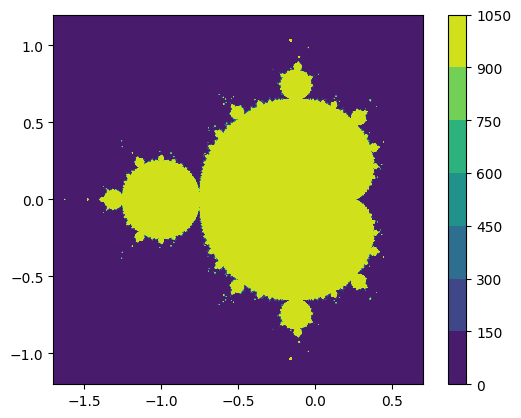

In [2]:
mandelbrot = Mandelbrot()
mandelbrot.set(max_iter=1000, plot=True)

---

<br/>

<h2 align="center"> 2. Monte Carlo Integration </h2>

---

<br/>

<h3 align="center"> 2.1 Pure random sampling </h3>

In [2]:
### Local requirements ###
import mandelbrot.sampling.pure_random as pr

In [3]:
# Generate a new Mandelbrot set
pr_mandelbrot = Mandelbrot(x_min=-2.5, x_max=1, y_min=-1, y_max=1)

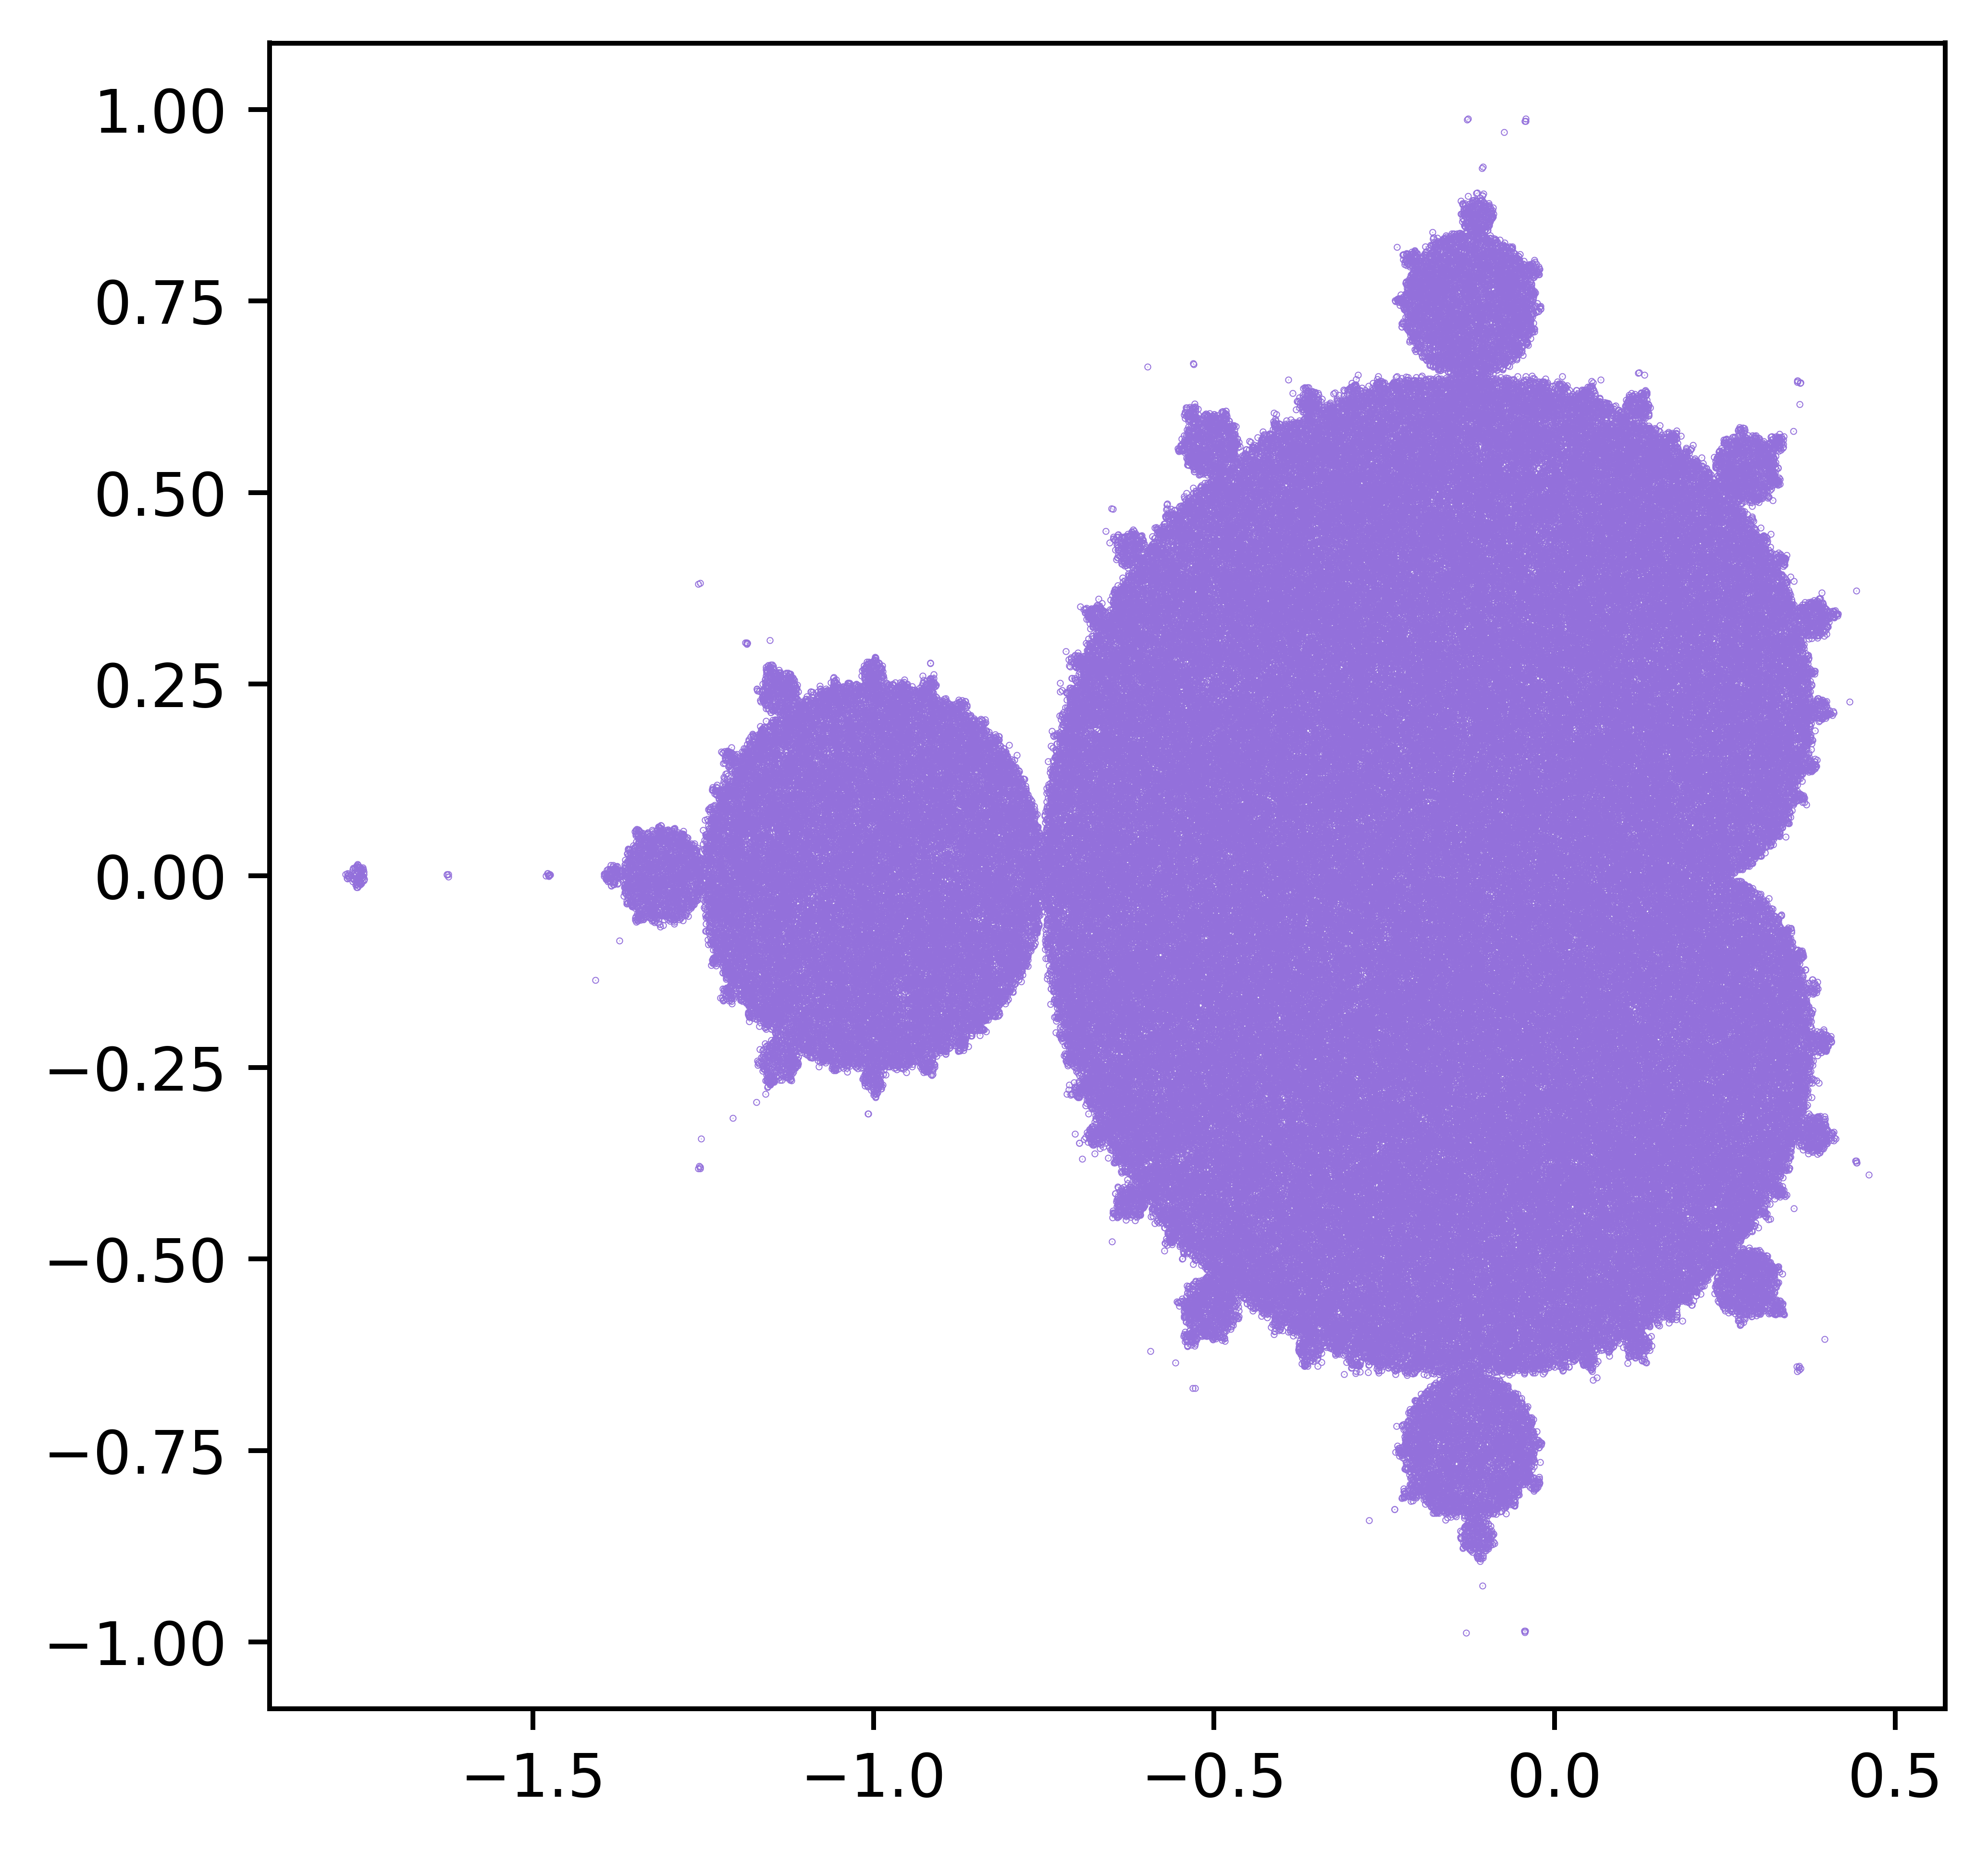

In [4]:
n_samples, n_iters  = 1_000_000, 256
pr_sample, pr_in_mandelbrot = pr.sampler(pr_mandelbrot, n_samples, n_iters, verboser=True plot=True)

In [5]:
# TODO scale the width and height of high-DPI plot to match the format of the notebook
# out = widgets.Output(layout={'width': '500px', 'height': '500px'})
# with out:
#     plotter.plot_mandbrot_sample(mc_sample, mc_sample_in_mandelbrot, plot_color='b')
# display(out)

In [6]:
# Estimate the area and print the results
area_pr = utils.estimate_mandelbrot_area(pr_sample, pr_in_mandelbrot, pr_mandelbrot, verbose=True)

A = 1.516858 for 1000000 samples & 256 iterations


---

<br/>

<h3 align="center"> 2.2. Latin hypercube sampling </h3>

In [13]:
### Local requirements ###
import mandelbrot.sampling.latin_hypercube as lh

In [14]:
# Generate a new Mandelbrot set
lh_mandelbrot = Mandelbrot(x_min=-2.5, x_max=1, y_min=-1, y_max=1)

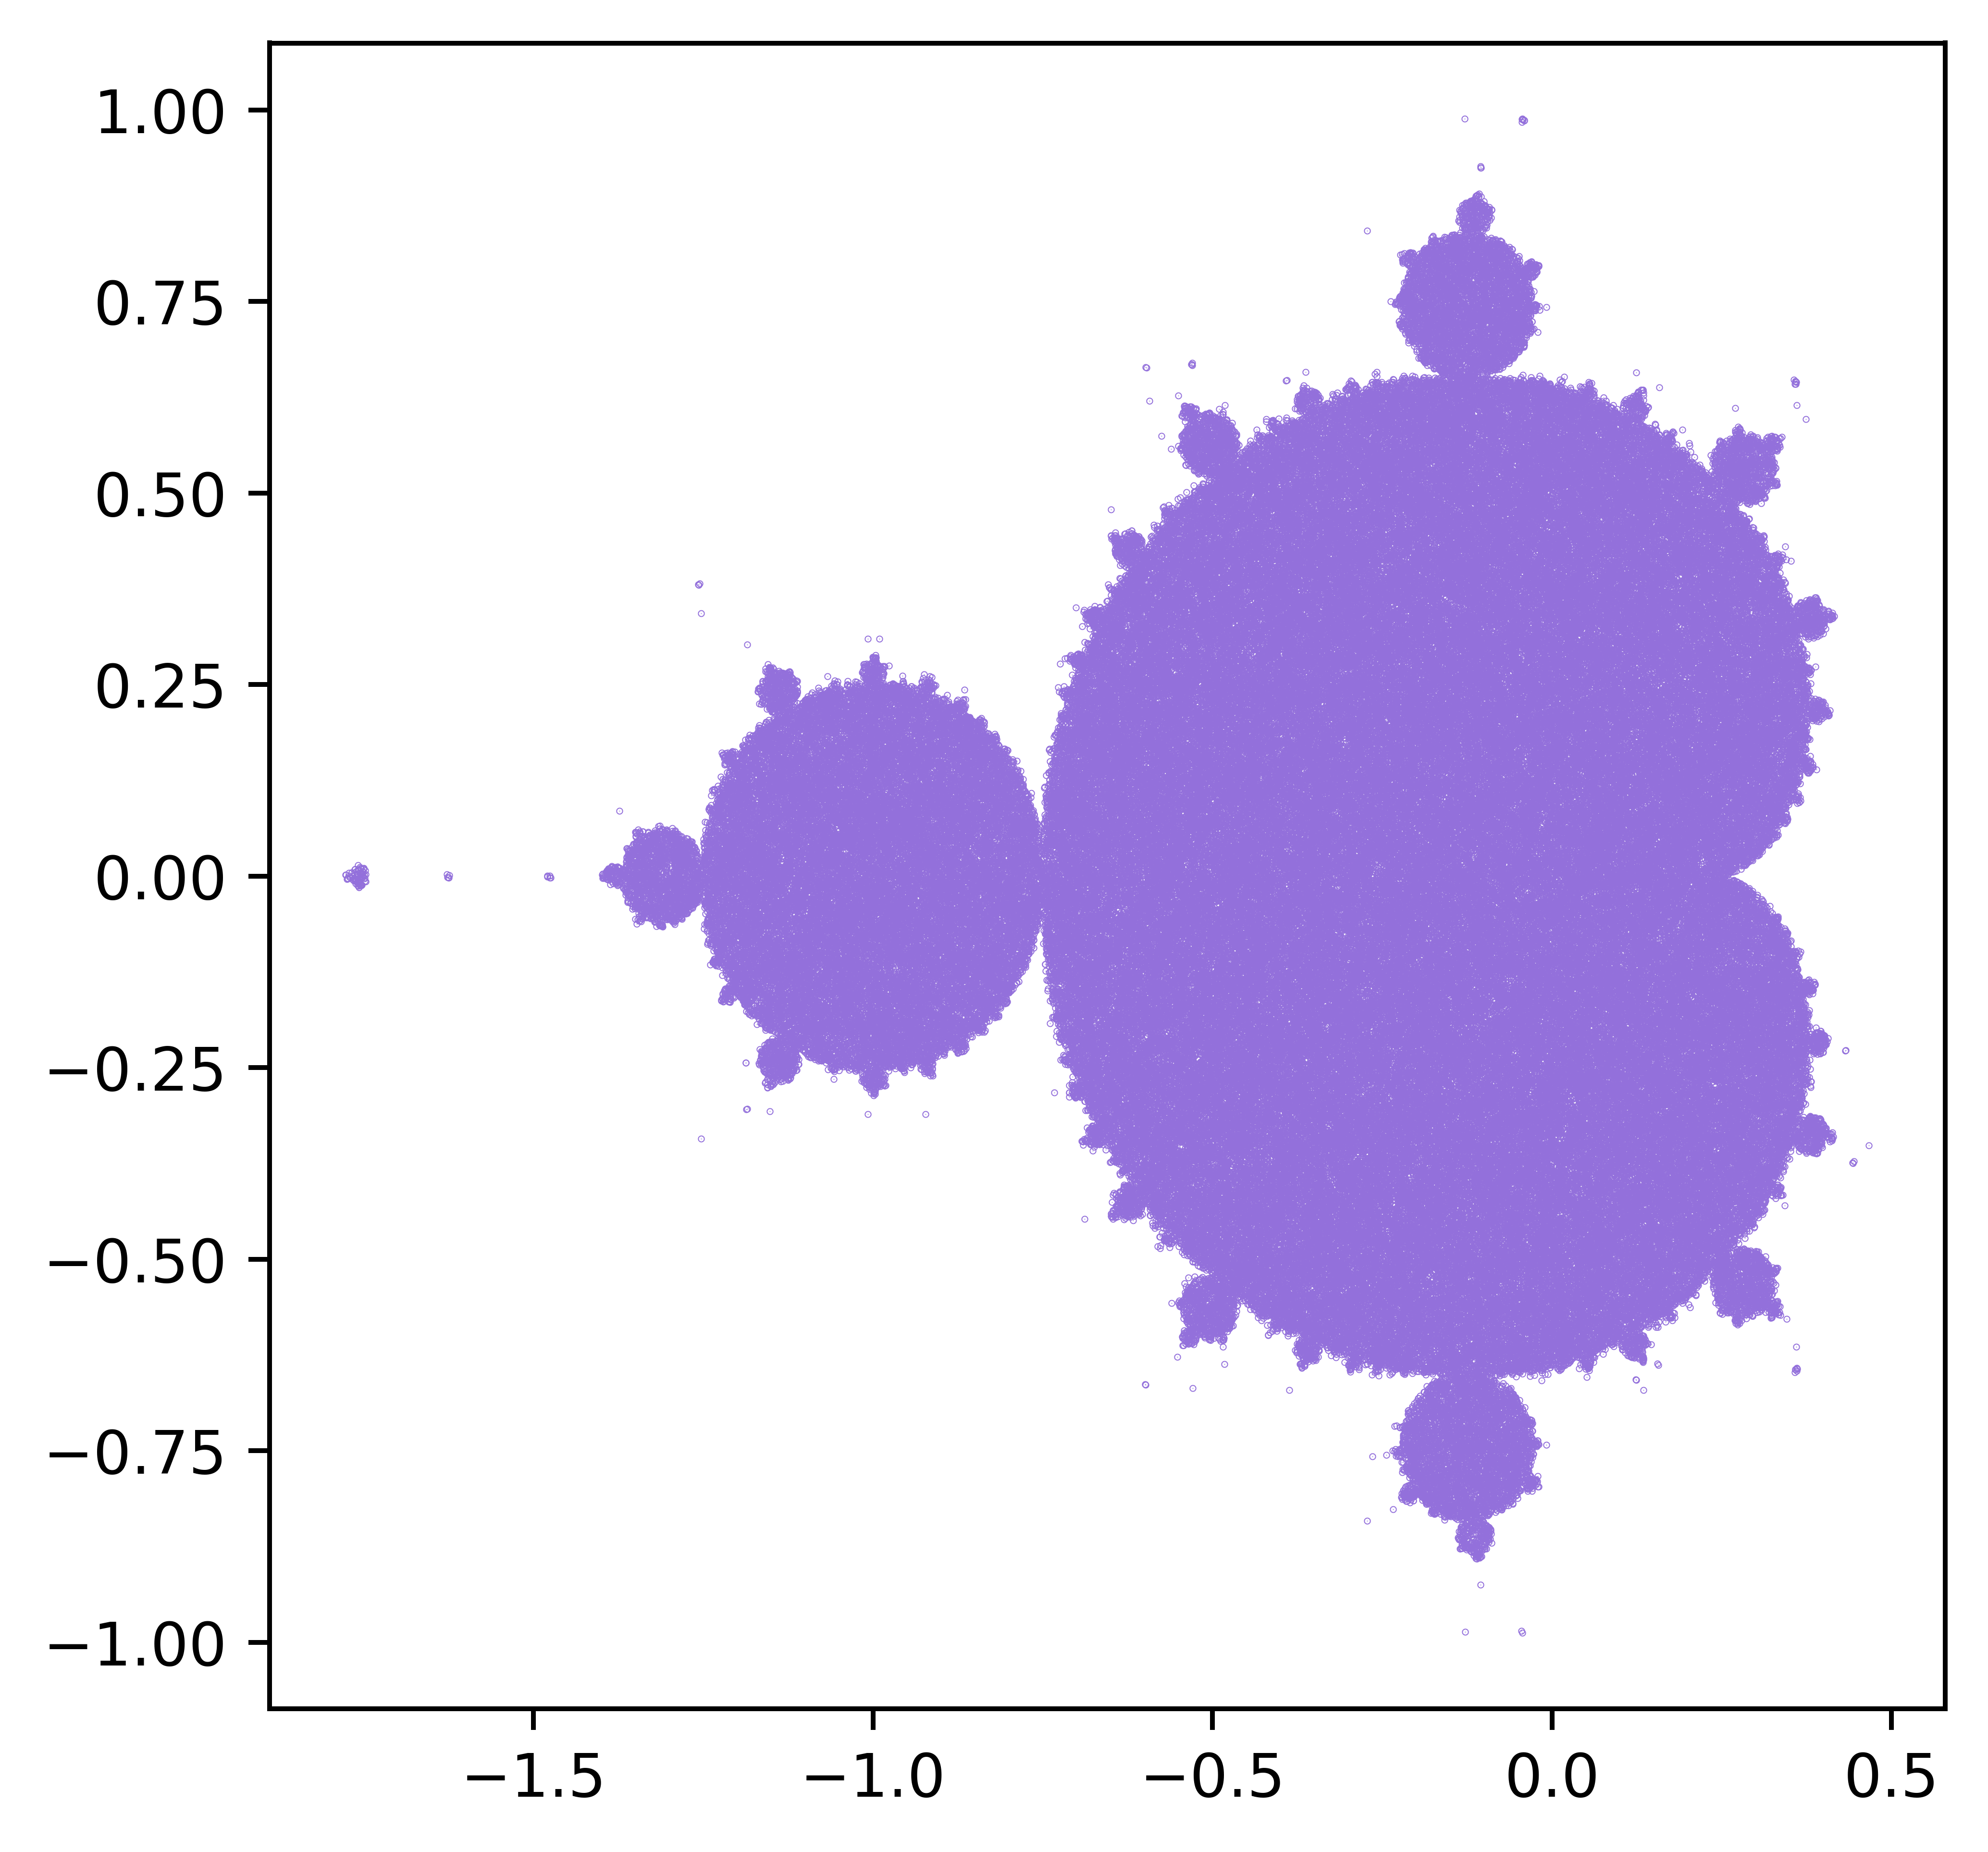

In [15]:
# Perform Monte Carlo integration using Latin hypercube sampling
n_samples, n_iters  = 1_000_000, 256
lh_sample, lh_in_mandelbrot = lh.sampler(lh_mandelbrot, n_samples, n_iters, plot=True)
# lh_sample, lh_in_mandelbrot = lh.new_sampler(lh_mandelbrot, n_samples, n_iters, plot=True)

In [11]:
# Estimate the area and print the results
area_lh = utils.estimate_mandelbrot_area(lh_sample, lh_in_mandelbrot, lh_mandelbrot, verbose=True)

A = 1.522948 for 1000000 samples & 256 iterations


---

<br/>

<h3 align="center"> 2.3. Orthogonal sampling </h3>

In [32]:
### Local requirements ###
import mandelbrot.sampling.orthogonal as ol

In [33]:
# Generate a new Mandelbrot set
ol_mandelbrot = Mandelbrot(x_min=-2.5, x_max=1, y_min=-1, y_max=1)

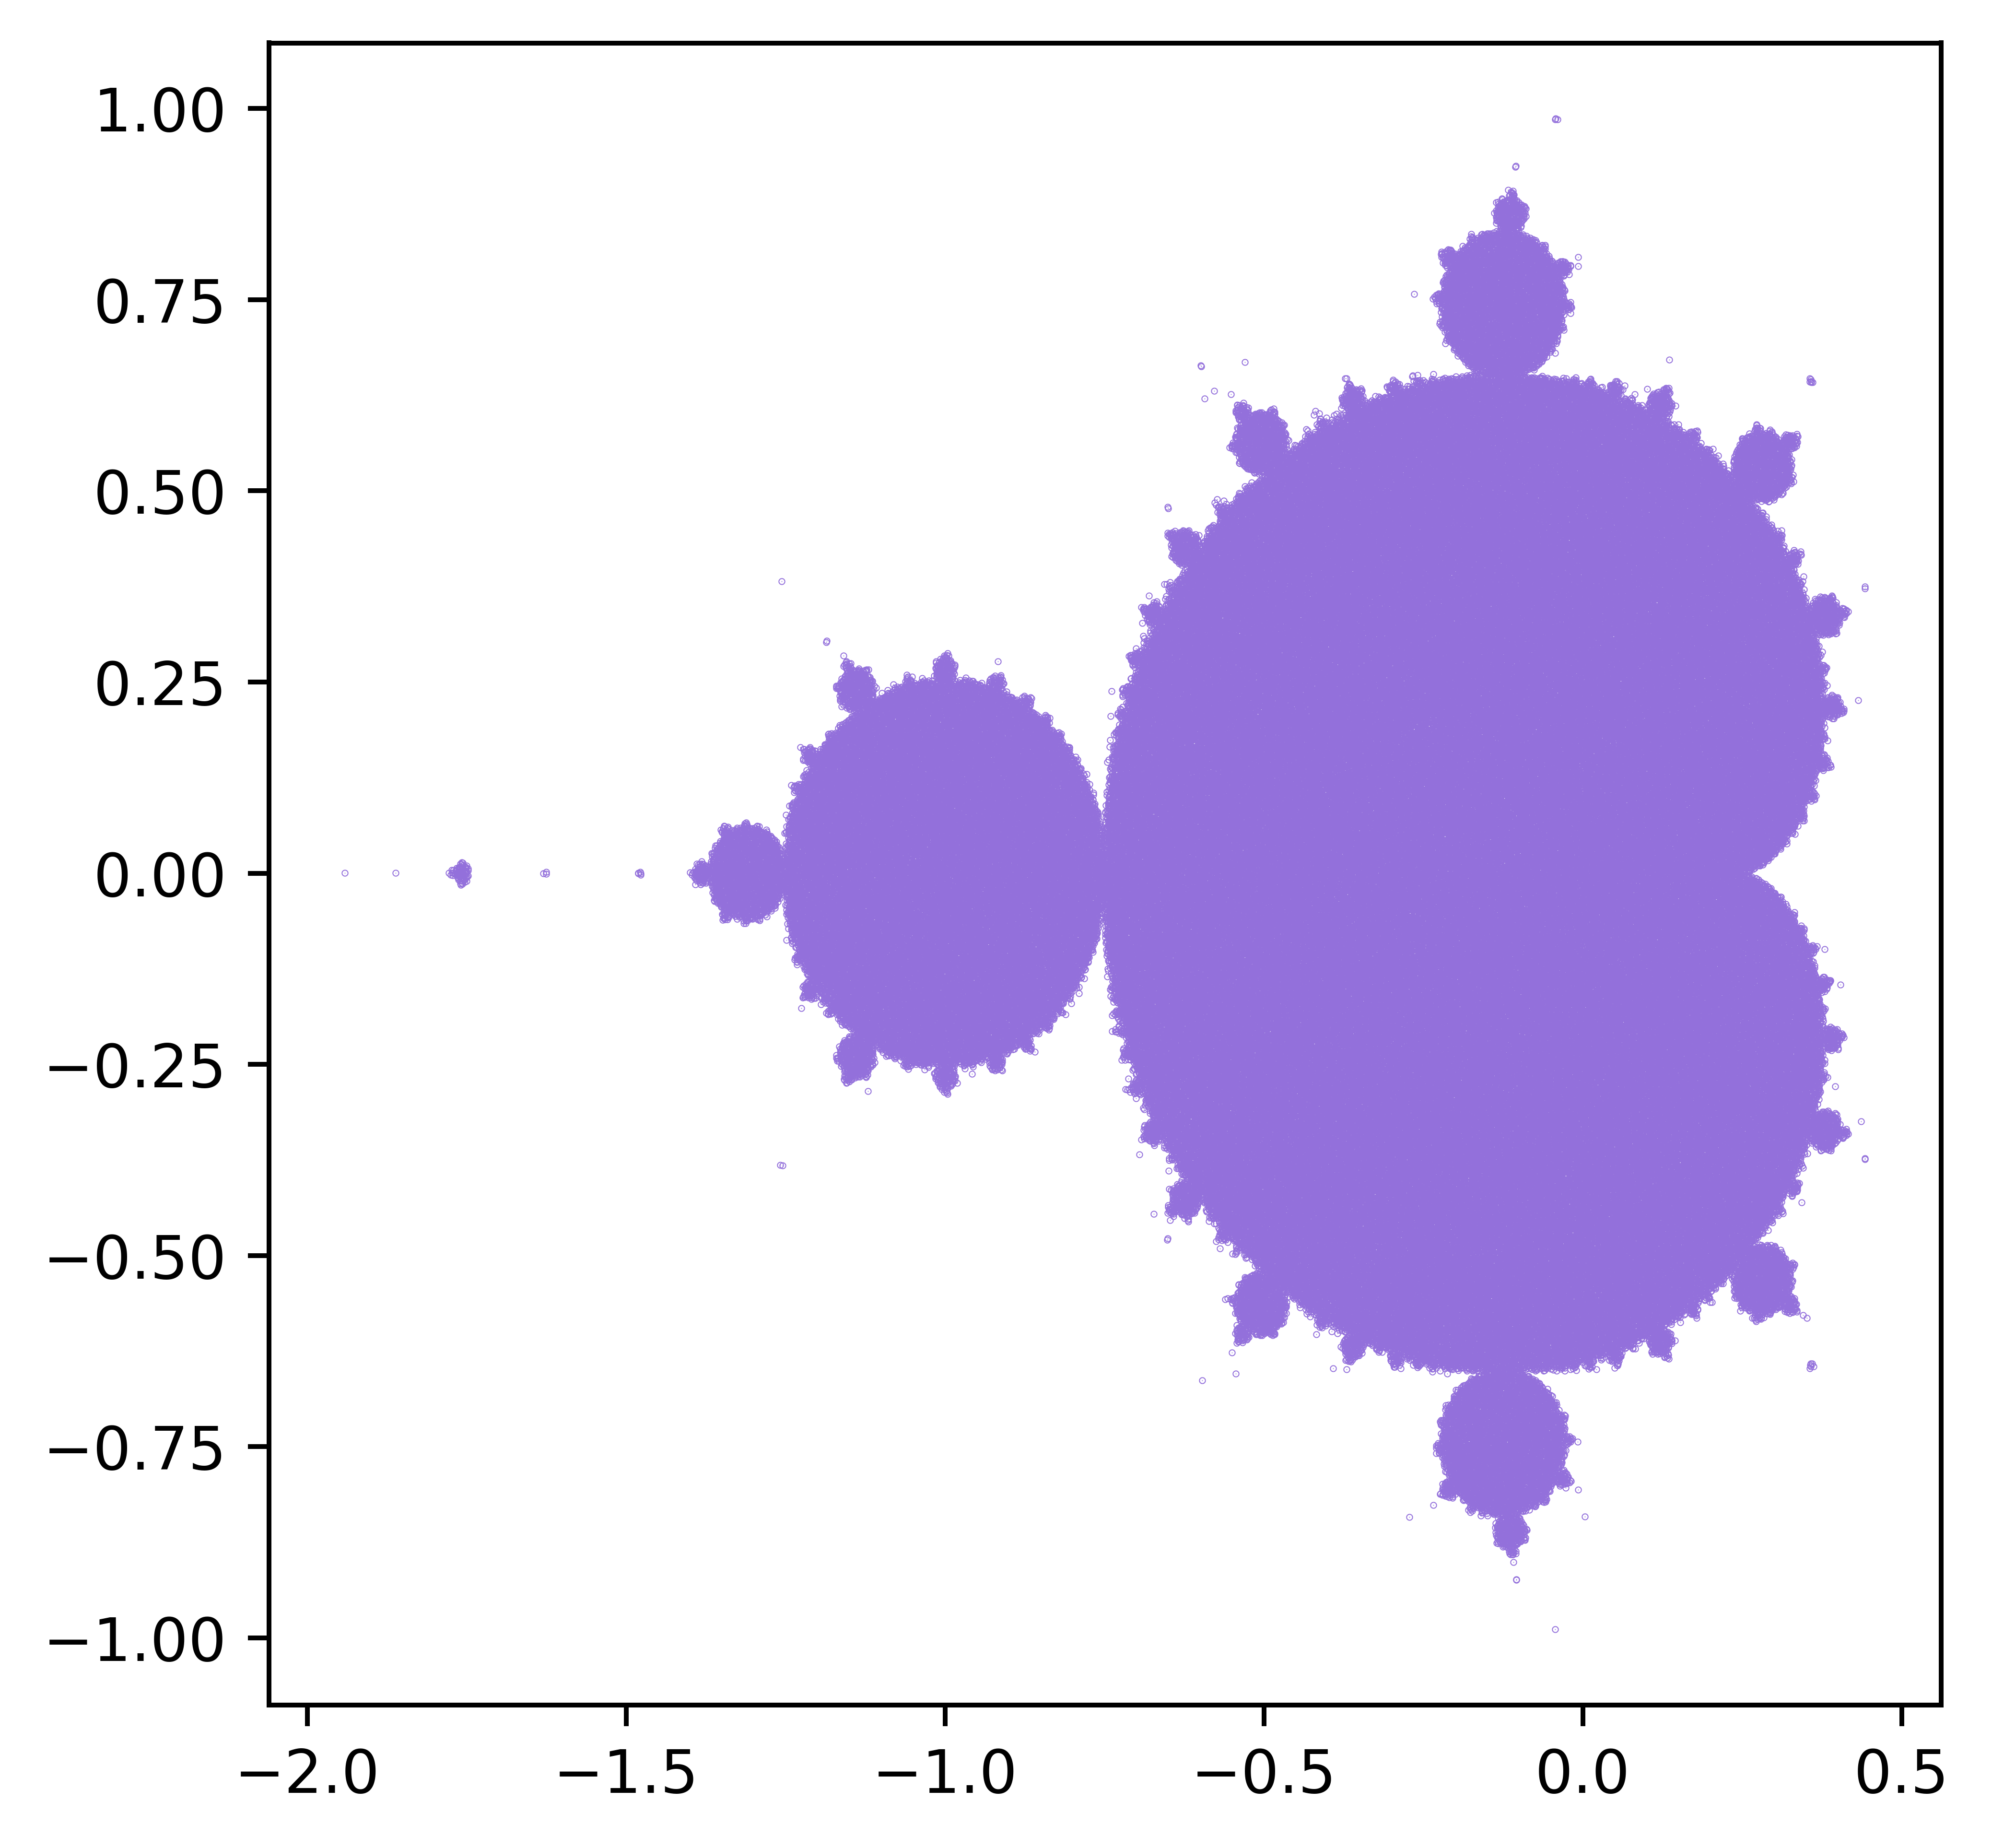

In [34]:
# Perform Monte Carlo integration using orthogonal sampling
n_sample, n_iters  = 1_000_000, 256
ol_sample, ol_in_mandelbrot = ol.sampler(ol_mandelbrot, n_sample, n_iters, plot=True)

In [35]:
# Estimate the area of this plot and print the results
area_ol = utils.estimate_mandelbrot_area(ol_sample, ol_in_mandelbrot, ol_mandelbrot, verbose=True)

A = 1.5214290000000001 for 1000000 samples & 256 iterations


---

<br/>

<h2 align="center"> 3. Accuracy of the Monte Carlo Estimations </h2>

---
---

In [1]:
### Local requirements ###
import pandas as pd

from mandelbrot import utils
from mandelbrot.sampling import pure_random as pr
from mandelbrot.sampling import latin_hypercube as lh
from mandelbrot.sampling import orthogonal as ol

---

<h3 align="center"> 3.1 Collecting Area Estimates </h3>

**Warning!** The code cells of this section have runtimes of approximately 5 minutes each. These cells also create files (which will overwrite the data used in this notebook).

In [9]:
# utils.estimate_A_j_s(Mandelbrot(), pr.sampler, abbr='pr')  # Creates datafiles for pure random sampling

Running estimations for s = 100...
Done!
Running estimations for s = 1000...
Done!
Running estimations for s = 10000...
Done!
Running estimations for s = 100000...
Done!
Running estimations for s = 1000000...
Done!


In [ ]:
# utils.estimate_A_j_s(Mandelbrot(), lh.sampler, abbr='lh')  # Creates datafiles for latin hypercube sampling

Running estimations for s = 100...
Done!
Running estimations for s = 1000...
Done!
Running estimations for s = 10000...
Done!
Running estimations for s = 100000...
Done!
Running estimations for s = 1000000...
Done!


In [5]:
# utils.estimate_A_j_s(Mandelbrot(), ol.sampler, abbr='ol')  # Creates datafiles for orthogonal sampling

Running estimations for s = 100...
Done!
Running estimations for s = 1000...
Done!
Running estimations for s = 10000...
Done!
Running estimations for s = 100000...
Done!
Running estimations for s = 1000000...
Done!


---

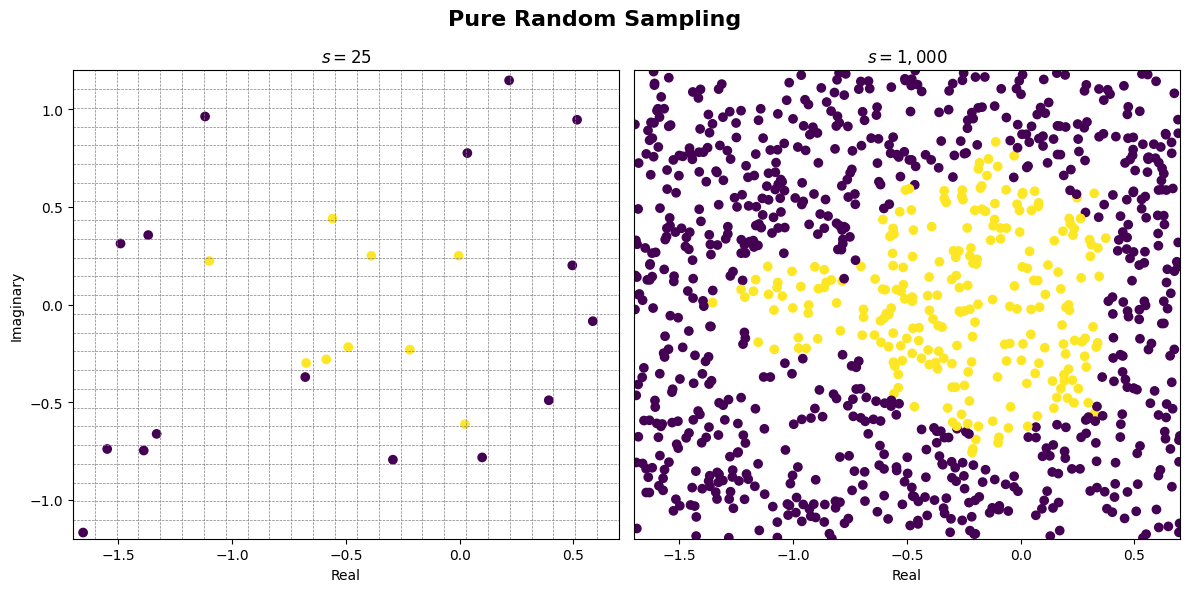

In [7]:
plotter.plot_sampling_illustration(Mandelbrot(), pr.sampler)

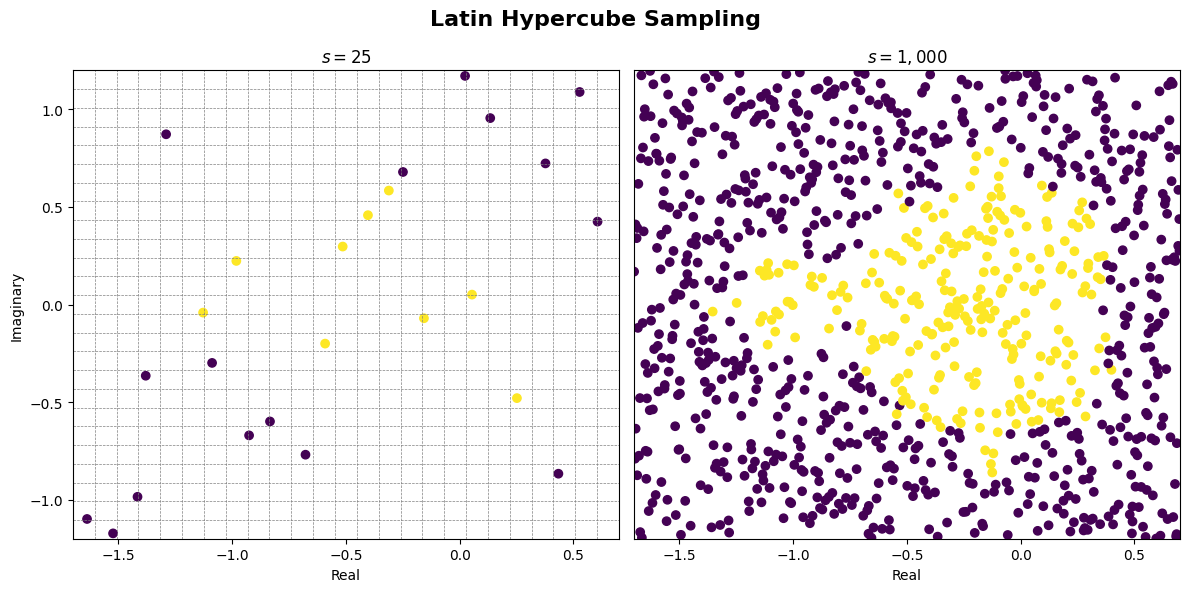

In [36]:
# TODO (maybe?) add diagnol lines to illustrate diagnol clustering
plotter.plot_sampling_illustration(Mandelbrot(), lh.sampler, latin_hypercube=True)

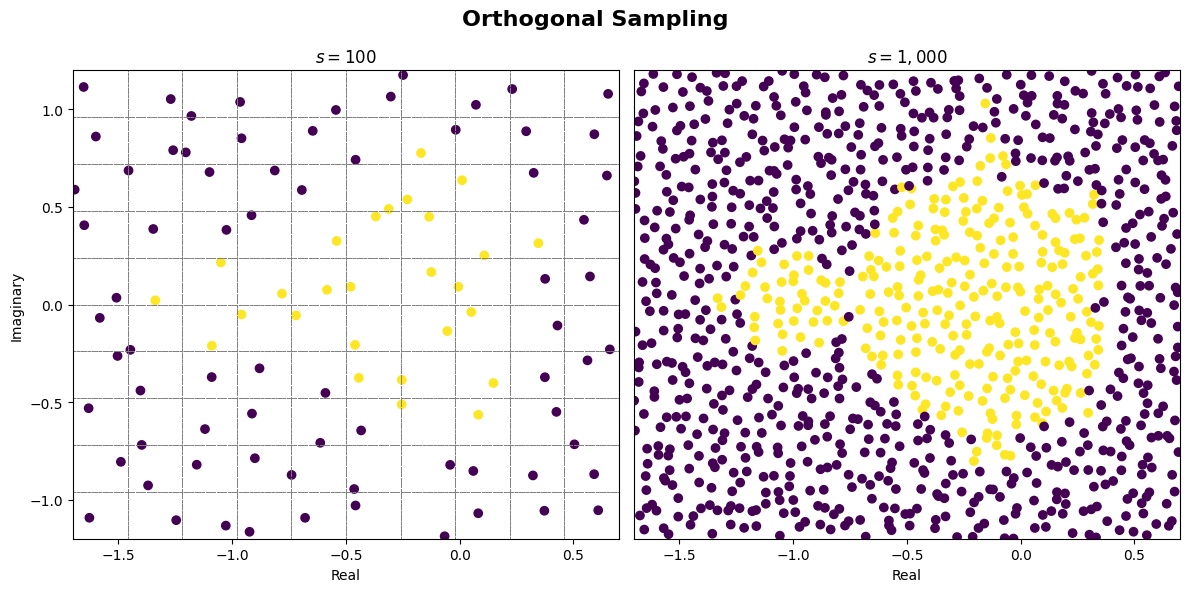

In [9]:
plotter.plot_sampling_illustration(Mandelbrot(), ol.sampler, orthogonal=True)

---

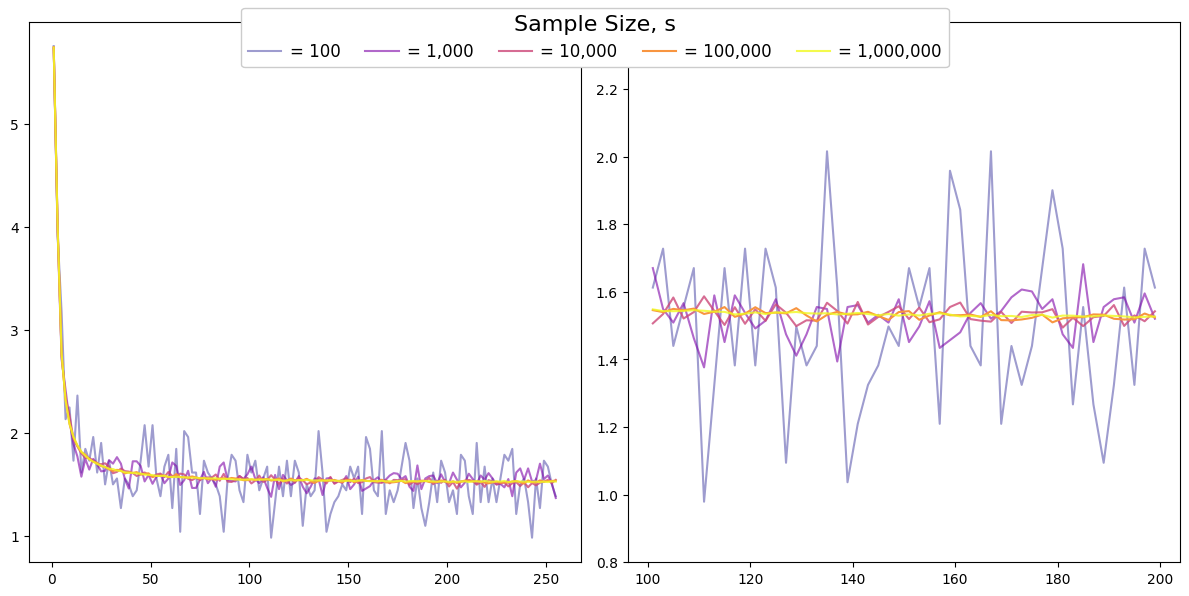

In [3]:
# TODO add x and y labels to the plot, remove y ticks

# New plot function
plotter.plot_area_j_s(abbr='pr')

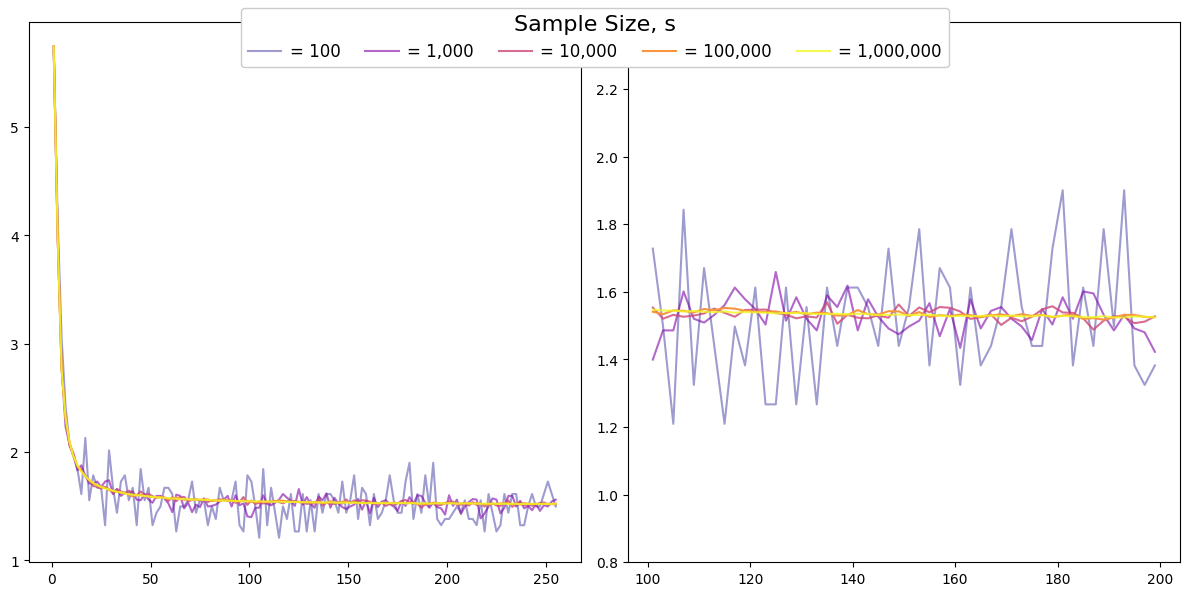

In [4]:
plotter.plot_area_j_s('lh')

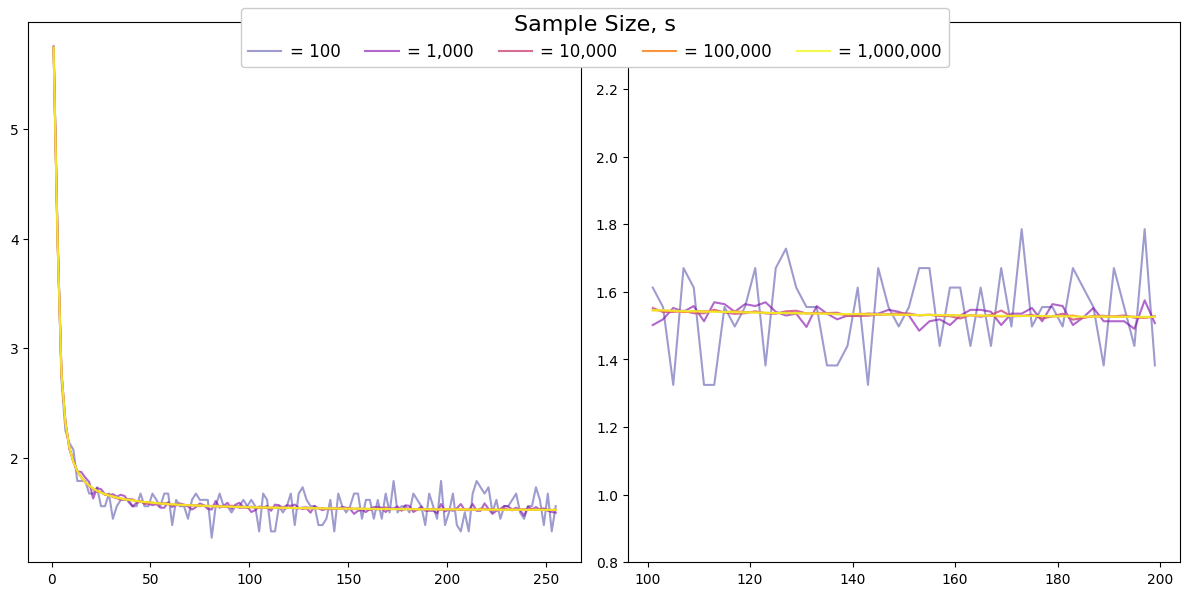

In [5]:
plotter.plot_area_j_s('ol')

---

<h2 align="center"> 3.2 Confidence Intervals </h2>

**Warning!** The code block that is commented out had a runtime of around 40 minutes.

In [2]:
### Local requirements ###
import pandas as pd

from mandelbrot import utils
from mandelbrot.sampling import pure_random as pr
from mandelbrot.sampling import latin_hypercube as lh
from mandelbrot.sampling import orthogonal as ol

In [15]:
# # 1. Run the simulations and estimate the means and standard deviations
# methods = ['Pure Random', 'Latin Hypercube', 'Orthogonal']
# pr_mean, pr_std, pr_err = utils.estimate_mean_area(250, pr.sampler, Mandelbrot(), n_samples=1_000_000, n_iters=255)
# lh_mean, lh_std, lh_err = utils.estimate_mean_area(250, lh.sampler, Mandelbrot(), n_samples=1_000_000, n_iters=255)
# ol_mean, ol_std, ol_err = utils.estimate_mean_area(250, ol.sampler, Mandelbrot(), n_samples=1_000_000, n_iters=255)

In [18]:
# # 2. Export the results
# pd.DataFrame({
#     'method': methods,
#     'mean': [pr_mean, lh_mean, ol_mean],
#     'std': [pr_std, lh_std, ol_std],
#     'err': [pr_err, lh_err, ol_err]
#     }).to_csv('data/mean_areas.csv', index=False)

In [22]:
pd.read_csv('data/mean_areas.csv')

method      mean       std       err
0      Pure Random  1.521227  0.002617  0.000166
1  Latin Hypercube  1.521399  0.001597  0.000101
2       Orthogonal  1.521351  0.000241  0.000015

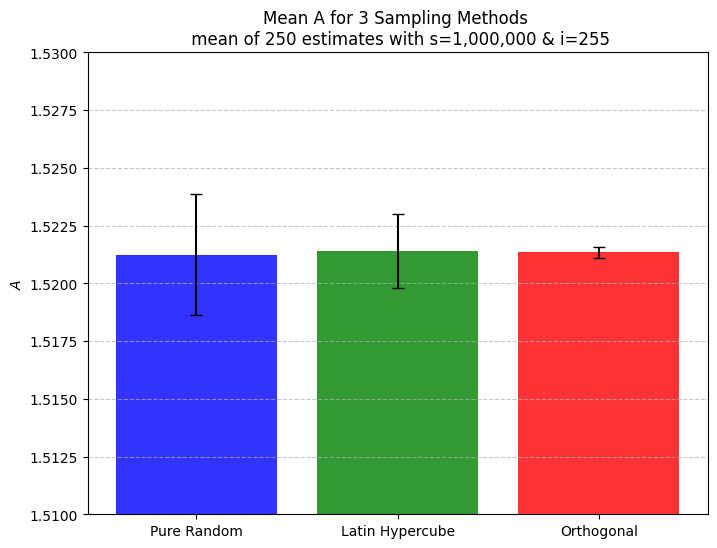

In [31]:
plt.figure(figsize=(8, 6))
x = [0, 1, 2]
y = pd.read_csv('data/mean_areas.csv')

plt.bar(
    x, 
    [y['mean'][0], y['mean'][1], y['mean'][2]], 
    yerr=[y['std'][0], y['std'][1], y['std'][2]], 
    capsize=4, 
    alpha=0.8, 
    color=['blue', 'green', 'red']
)

plt.ylabel(r'$A$')
plt.ylim(1.51, 1.53)
plt.title('Mean A for 3 Sampling Methods \n mean of 250 estimates with s=1,000,000 & i=255')
plt.xticks(x, ['Pure Random', 'Latin Hypercube', 'Orthogonal'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


---

<h2 align="center"> 4. Optimizing Area Estimation </h2>